<table style="width: 100%; border-collapse: collapse;" border="0">
<tr>
<td><b>Created:</b> Tuesday 31 January 2017</td>
<td style="text-align: right;"><a href="https://www.github.com/rhyswhitley/fire_limitation">github.com/rhyswhitley/fire_limitation</td>
</tr>
</table>

<div>
<center>
<font face="Times">
<br>
<h1>Quantifying the uncertainity of a global fire limitation model using Bayesian inference</h1>
<h2>Part 3: Data visualisation</h2>
<br>
<br>
<sup>1,* </sup>Douglas Kelley, 
<sup>2 </sup>Ioannis Bistinas, 
<sup>3, 4 </sup>Chantelle Burton, 
<sup>1 </sup><s>Tobias Marthews,</s>
<sup>5 </sup>Rhys Whitley
<br>
<br>
<br>
<sup>1 </sup>Centre for Ecology and Hydrology, Maclean Building, Crowmarsh Gifford, Wallingford, Oxfordshire, United Kingdom
<br>
<sup>2 </sup>Vrije Universiteit Amsterdam, Faculty of Earth and Life Sciences, Amsterdam, Netherlands
<br>
<sup>3 </sup>Met Office United Kingdom, Exeter, United Kingdom
<br>
<sup>4 </sup>Geography, University of Exeter, Exeter, United Kingdom
<br>
<sup>5 </sup>Natural Perils Pricing, Commercial & Consumer Portfolio & Pricing, Suncorp Group, Sydney, Australia
<br>

### Load libraries

In [1]:
# data munging and analytical libraries 
import re
import os
import numpy as np
import pandas as pd

# graphical libraries
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

# default plot settings for notebook
from IPython.core.pylabtools import figsize
figsize(11, 9)
plt.style.use('ggplot')

%matplotlib inline

dataPath = "../data/globfire.csv"

### Import data

In [2]:
DATAPATH = os.path.expanduser(dataPath)

fd = pd.read_csv(DATAPATH)

### Function definitions

In [3]:
def ignition(lightning, pasture_area, pop_density, kp, kd1):
    """
    Definition for the measure of ignition
    """
    return lightning + kp*pasture_area + kd1*pop_density

def supression(crop_area, pop_density, kd2):
    """
    Definition for the measure of fire supression
    """
    return crop_area + kd2*pop_density

def np_sigmoid(x, a, b):
    """
    Sigmoid function to describe limitation using tensor
    """
    return 1.0/(1.0 + np.exp(a*(x + b)))

### Extra model covariates determined

Determine the ignition and supression covariates as per the model documentation

In [4]:
fd['ignite'] = ignition(fd["lightning_ignitions"].values, \
               fd["pasture"].values, \
               fd["population_density"].values, \
               1, 10)

fd['suppress'] = supression(fd["cropland"].values, \
                 fd["population_density"].values, \
                 1)

def np_sigmoid(x, a, b):
    """
    Sigmoid function to describe limitation using tensor
    """
    return 1.0/(1.0 + np.exp(a*(x - b)))

## Data viz below

### Base Data

In [71]:
def pltVsFire(x, xlab, pnt = 'o', *args, **kw):
    plt.plot(x, fd.fire, pnt, alpha = 0.01, *args, **kw)
    plt.ylabel("Burnt area fraction")
    plt.xlabel(xlab);

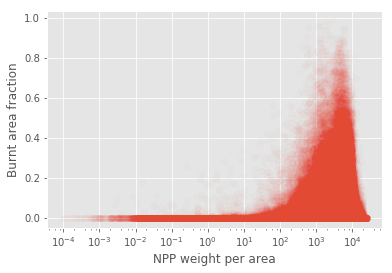

In [6]:
pltVsFire(fd.NPP, "NPP weight per area");
plt.xscale('log')

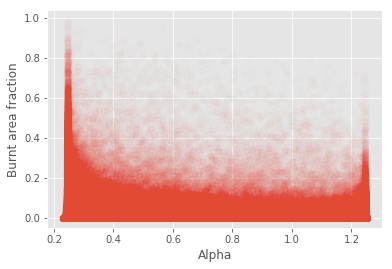

In [7]:
pltVsFire(fd.alpha, "Alpha")

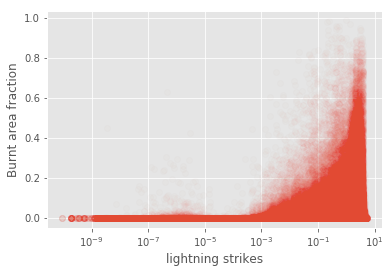

In [8]:
pltVsFire(fd.lightning_ignitions, "lightning strikes")
plt.xscale('log')

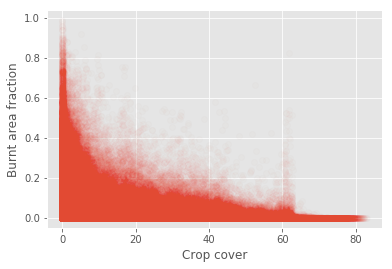

In [9]:
pltVsFire(fd.cropland, "Crop cover")

### Secondary Data

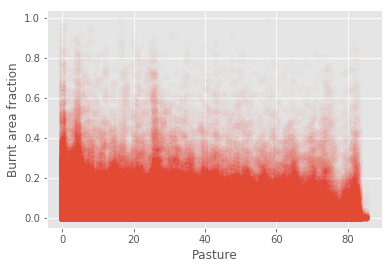

In [10]:
pltVsFire(fd.pasture, "Pasture")

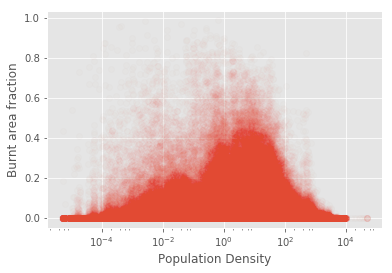

In [11]:
pltVsFire(fd.population_density, "Population Density")
plt.xscale('log')

### Constructed limitations - priors

(0.5, 25031.74609375)

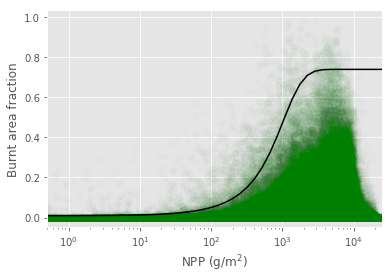

In [87]:
pltVsFire(fd.NPP, "NPP (g/m$^2$)", 'go')
NPP = np.logspace(-6, np.log10(fd.NPP.max()), 100)
Fire = np_sigmoid(NPP, -0.002, 500) - 0.26
plt.plot(NPP, Fire, 'k')
plt.xscale('log')
plt.xlim([0.5, fd.NPP.max()])


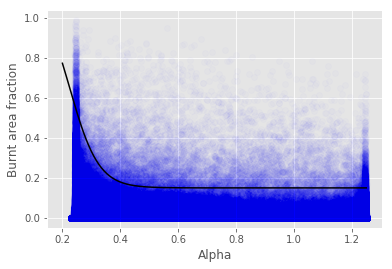

In [77]:
pltVsFire(fd.alpha, "Alpha",'bo')
Alpha = np.arange(0.2, fd.alpha.max(), 0.003)
Fire = np_sigmoid(Alpha, 20, 0.225)+0.15
plt.plot(Alpha, Fire, 'k')


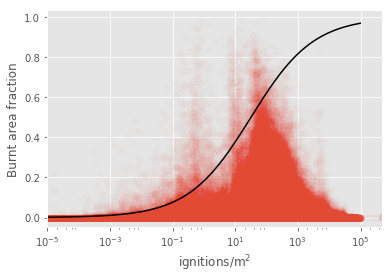

In [90]:
pltVsFire(fd.ignite, "ignitions/m$^2$")
#Ignite = np.logspace(-10, np.log10(fd.ignite.max()), 100)
#Ignite = 10**(Ignite)
Ignite = np.arange(-15,5, 0.01)
Fire = np_sigmoid(Ignite, -1, 1.5)
plt.plot(10**Ignite, Fire, 'k')
plt.xlim([10**-5, fd.ignite.max()])


plt.xscale('log')

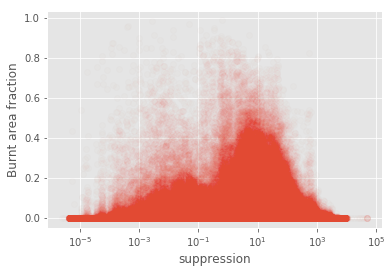

In [22]:
pltVsFire(fd.suppress, "suppression")
plt.xscale('log')